In [1]:
library(tidyverse)

data_q2 <- read_csv("Appointments for Second quarter of 2024CSV.csv") %>%
  mutate(الربع = "الربع الثاني")

data_q3 <- read_csv("Appointments for third quarter of 2024CSV.csv") %>%
  mutate(الربع = "الربع الثالث")

all_q_data <- bind_rows(data_q2, data_q3)

colnames(all_q_data) <- str_trim(colnames(all_q_data))

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 1305 Columns: 14
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (10): الجنس, الجنسية, الفئة العمرية, الجهة, الكادر الوظيفي, المرتبة الوظ...
dbl  (4): رقم الموظف, السنة, الشهر, اليوم

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_co

In [2]:
colnames(all_q_data)

[1] "رقم الموظف"       "الجنس"            "الجنسية"          "الفئة العمرية"   
 [5] "الجهة"            "الكادر الوظيفي"   "المرتبة الوظيفية" "المسمى الوظيفي"  
 [9] "المقر"            "المنطقة الإدارية" "تصنيف العملية"    "السنة"           
[13] "الشهر"            "اليوم"            "الربع"

In [3]:
all_q_data <- all_q_data %>%
  unite("الجنس_والعمر", الجنس, `الفئة العمرية`, sep = " - ")

In [4]:
count(all_q_data, الجنس_والعمر)

الجنس_والعمر,n
<chr>,<int>
أنثى - 20-24,34
أنثى - 20-25,46
أنثى - 25-30,552
أنثى - 26-30,213
أنثى - 31-35,2995
أنثى - 36-40,2870
أنثى - 41-45,1027
أنثى - 46-50,152
أنثى - 51-55,17


In [5]:
all_q_data <- all_q_data %>%
  filter(!(الجنس_والعمر %in% c(
    "أنثى - 20-24",
    "أنثى - 51-56",
    "أنثى - 56-59",
    "أنثى - 60 فاكثر", 
    "أنثى - 63-64",
    "ذكر - 20-24",
    "ذكر - 56-59",
    "ذكر - 63-64",
    "ذكر - 60 فاكثر",
    "ذكر - 65 فاكثر"
  )))

In [6]:
count(all_q_data, الجنس_والعمر)

الجنس_والعمر,n
<chr>,<int>
أنثى - 20-25,46
أنثى - 25-30,552
أنثى - 26-30,213
أنثى - 31-35,2995
أنثى - 36-40,2870
أنثى - 41-45,1027
أنثى - 46-50,152
أنثى - 51-55,17
ذكر - 20-25,125


In [7]:
custom_colors <- c(
    "أنثى - 20-25" = "#e0bbff",
    "أنثى - 25-30" = "#d291ff",
    "أنثى - 26-30" = "#c05cff",
    "أنثى - 31-35" = "#9932cc",
    "أنثى - 36-40" = "#800080",
    "أنثى - 41-45" = "#5a007a",
    "أنثى - 46-50" = "#3a0059",
    "أنثى - 51-55" = "#24003b",
    "ذكر - 20-25" = "#d0f0f0",
    "ذكر - 25-30" = "#a0e0e0",
    "ذكر - 26-30" = "#70d0d0",
    "ذكر - 31-35" = "#40c0c0",
    "ذكر - 36-40" = "#00aaaa",
    "ذكر - 41-45" = "#008080",
    "ذكر - 46-50" = "#006060",
    "ذكر - 51-55" = "#004040",
    "ذكر - 51-56" = "#002020",
    "ذكر - 57-61" = "#000f0f"
)

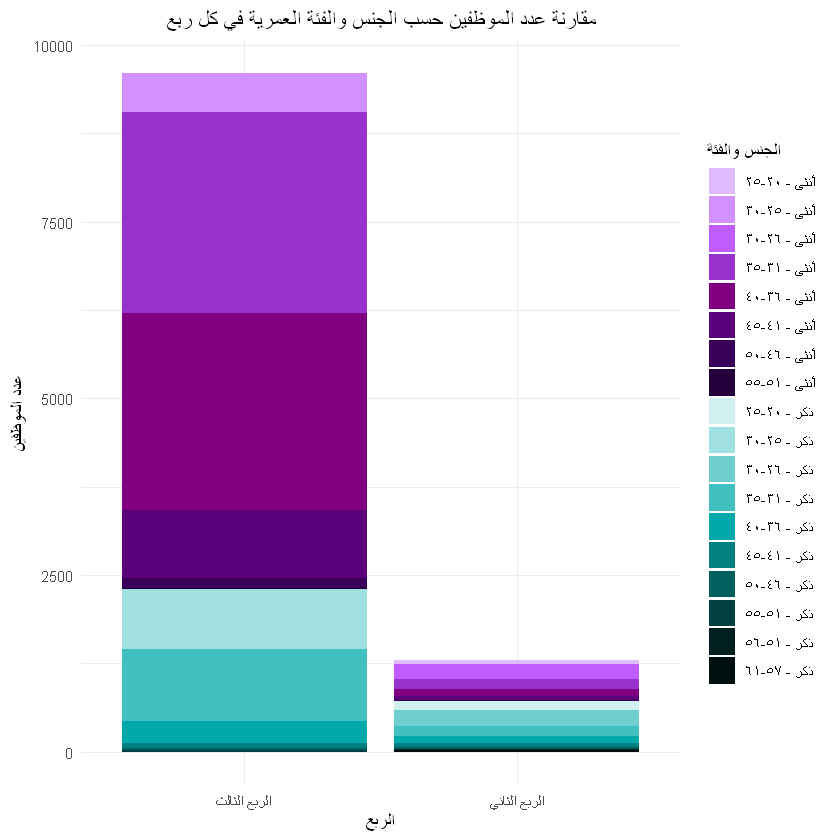

In [8]:
ggplot(all_q_data, aes(x = الربع, fill = الجنس_والعمر)) +
  geom_bar(position = "stack") +
  scale_fill_manual(values = custom_colors) + 
  labs(
    title = "مقارنة عدد الموظفين حسب الجنس والفئة العمرية في كل ربع",
    x = "الربع",
    y = "عدد الموظفين",
    fill = "الجنس والفئة"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


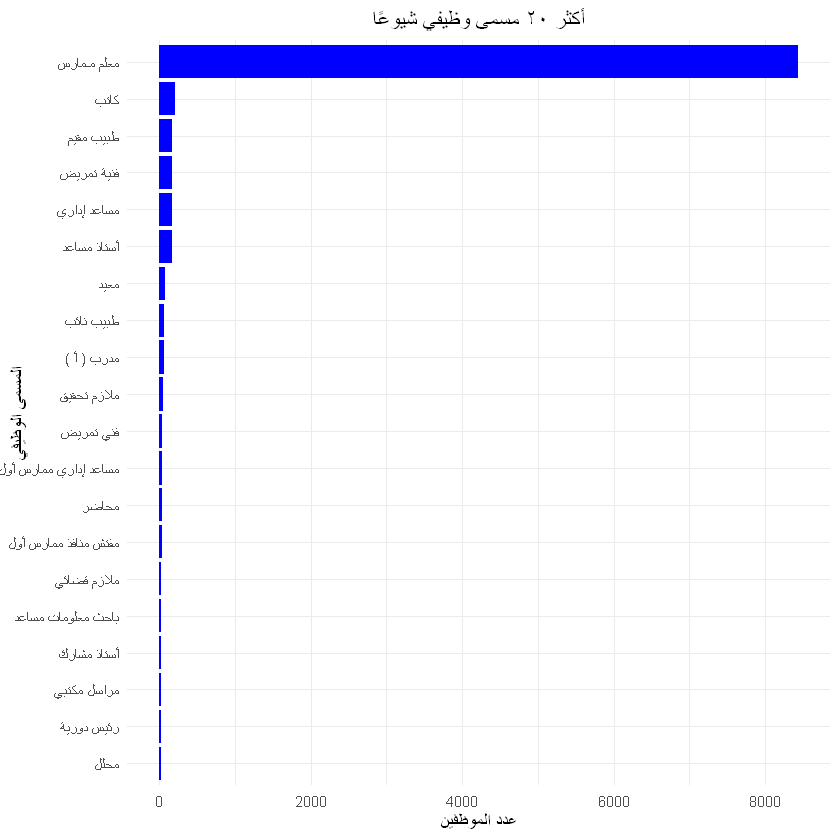

In [11]:
top_titles <- all_q_data %>%
  count(`المسمى الوظيفي`, sort = TRUE) %>%
  slice_max(n, n = 20)

ggplot(top_titles, aes(x = reorder(`المسمى الوظيفي`, n), y = n)) +
  geom_col(fill = "blue") +
  coord_flip() +
  labs(
    title = "أكثر 20 مسمى وظيفي شيوعًا",
    x = "المسمى الوظيفي",
    y = "عدد الموظفين"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.y = element_text()
  )

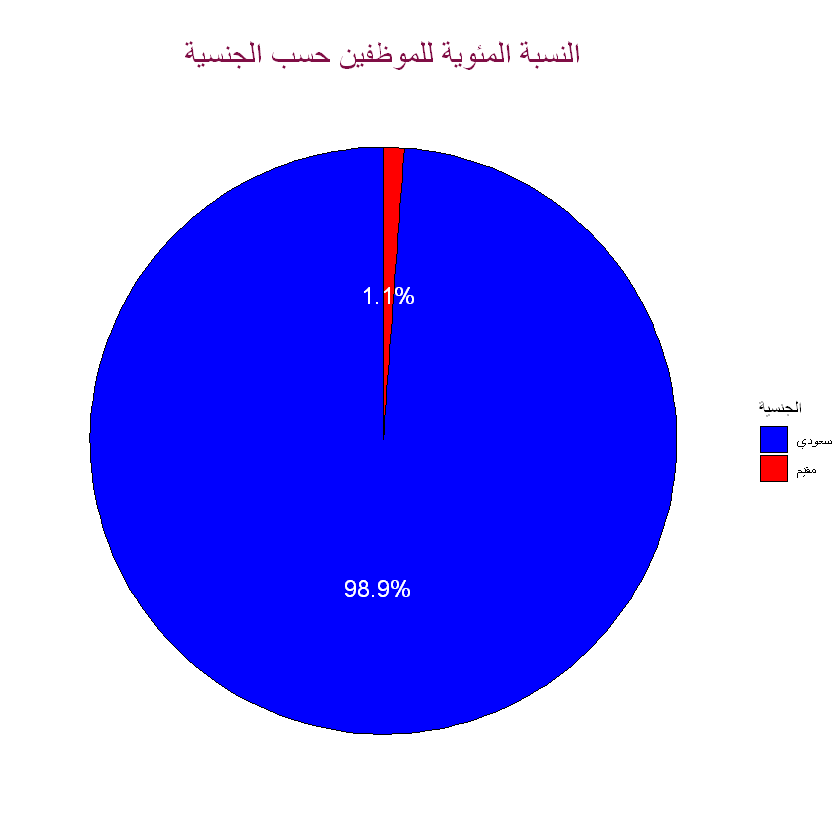

In [29]:
nationality_counts <- all_q_data %>%
count(الجنسية) %>%
mutate(percentage = n / sum(n) * 100)  

ggplot(nationality_counts, aes(x = "", y = percentage, fill = الجنسية)) +
geom_col(width = 1, color = "black") +
coord_polar(theta = "y") +
labs(
title = "النسبة المئوية للموظفين حسب الجنسية",
fill = "الجنسية"
) +
scale_fill_manual(values = c(
"سعودي" = "#0000ff",
"مقيم" = "#ff0000"
)) +
geom_text(aes(label = paste0(round(percentage, 1), "%")),
position = position_stack(vjust = 0.5),
color = "white",
size = 5) +
theme_void() +
theme (plot.title = element_text(hjust = 0.5, color = "#800e45", size = 20),
        plot.margin = margin(10, 13, 10, 10)
      )

In [ ]:
heat_data <- all_q_data %>%
  count(الجنسية, الجنس_والعمر)

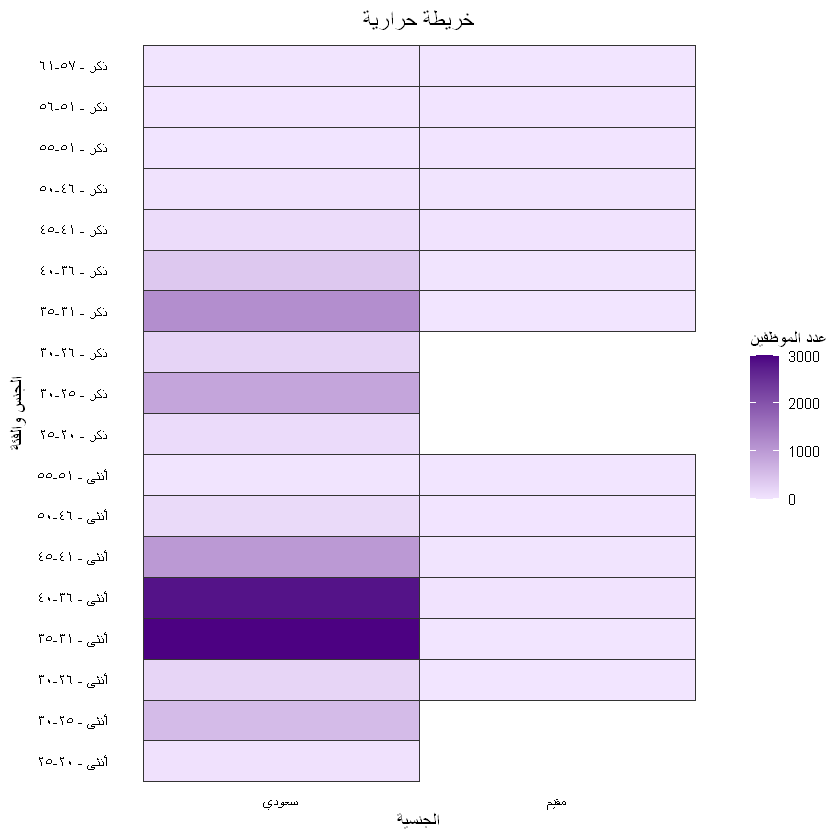

In [50]:
ggplot(heat_data, aes(x = الجنسية, y = الجنس_والعمر, fill = n)) +
  geom_tile(color = "gray20") + 
  scale_fill_gradient(low = "#f2e5ff", high = "#4b0082", limits = c(0, 3000)) +  
  labs(
    title = "خريطة حرارية",
    x = "الجنسية",
    y = "الجنس والفئة",
    fill = "عدد الموظفين"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, color = "black", size = 14),
    axis.text = element_text(color = "black"),
    axis.title = element_text(color = "black"),
    legend.title = element_text(color = "black"),
    legend.text = element_text(color = "black"),
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white", color = NA),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()

  )